In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv('HepatitisCdata.csv')

In [29]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [30]:
#HepatitusC['Sex'] = HepatitusC['Sex'].apply(lambda x: 1 if x == 'm' else 0)

In [31]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


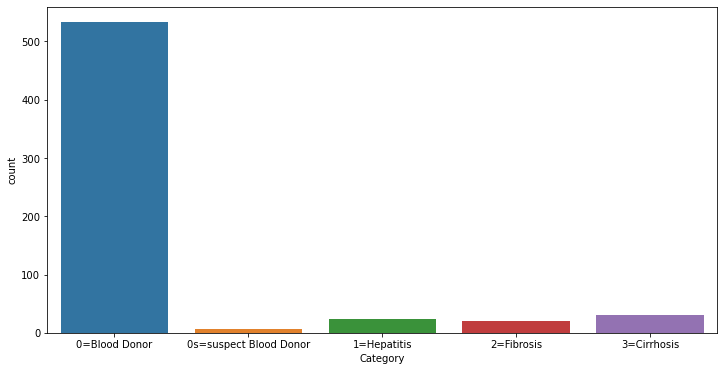

In [32]:
plt.rcParams['figure.figsize'] = (12,6)
sns.countplot('Category', data=data)
plt.show()

In [33]:
data = data.drop('Unnamed: 0',axis=1)

In [34]:
data.head(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


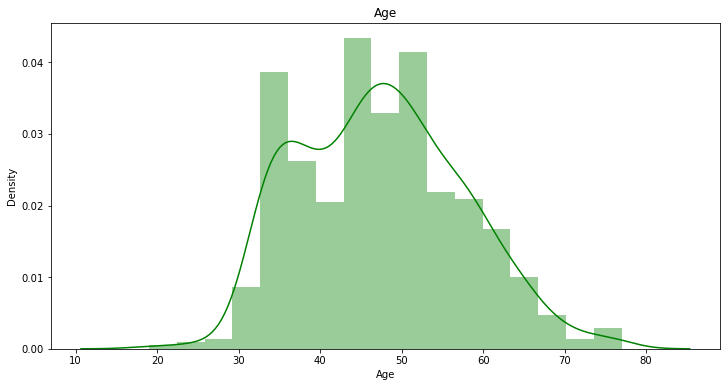

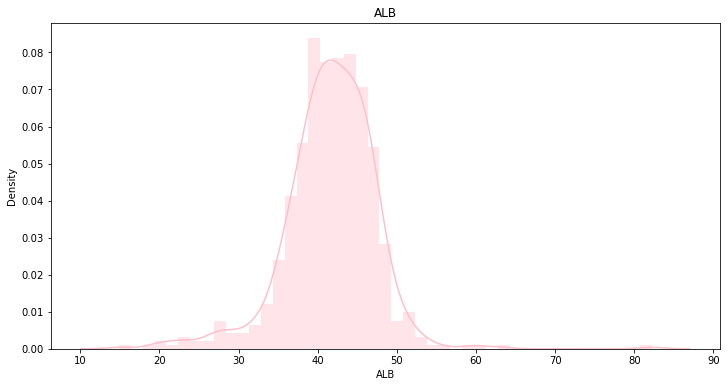

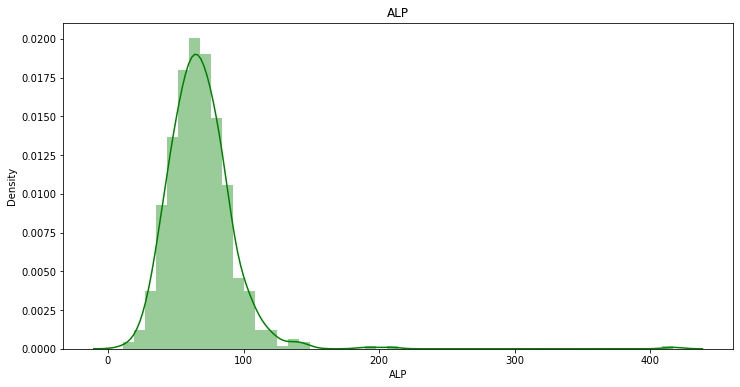

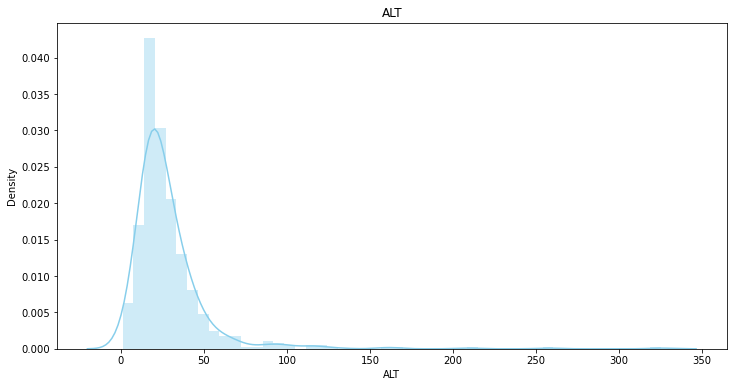

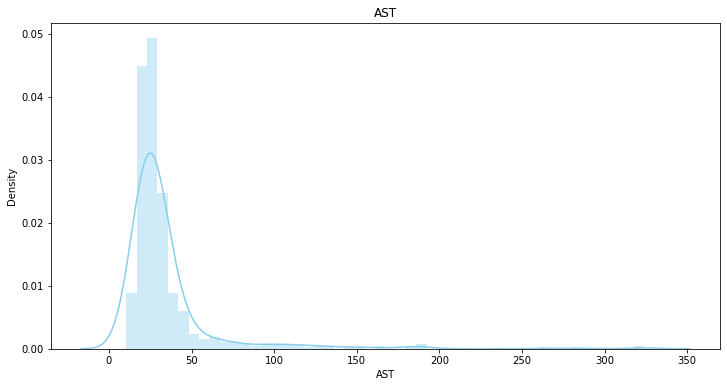

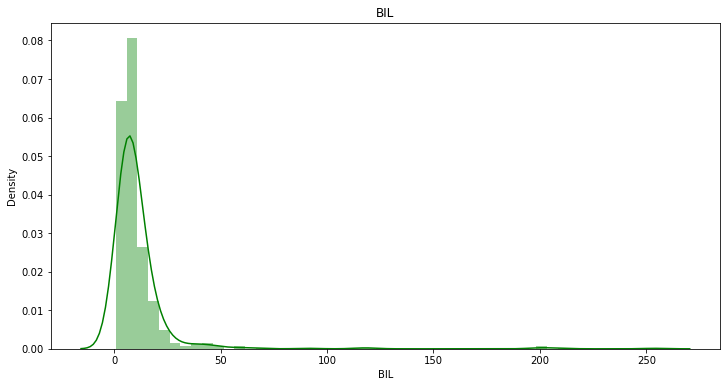

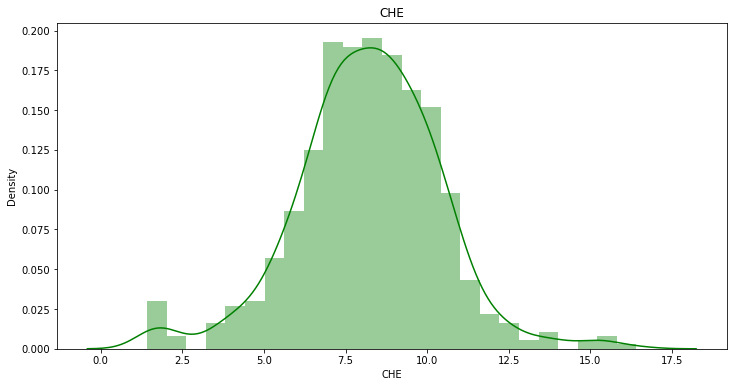

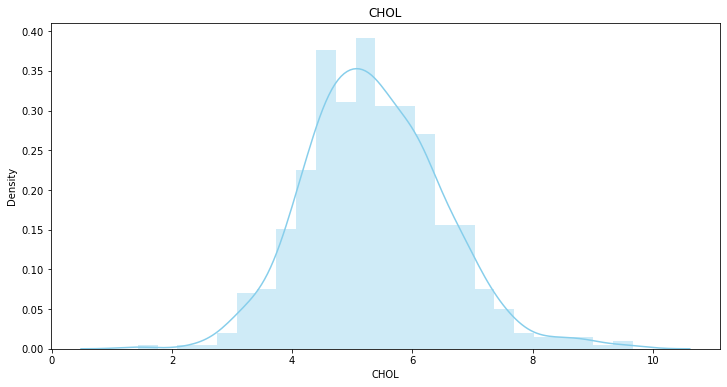

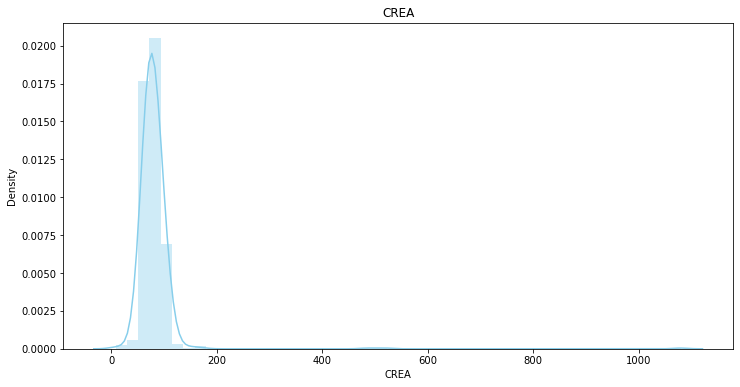

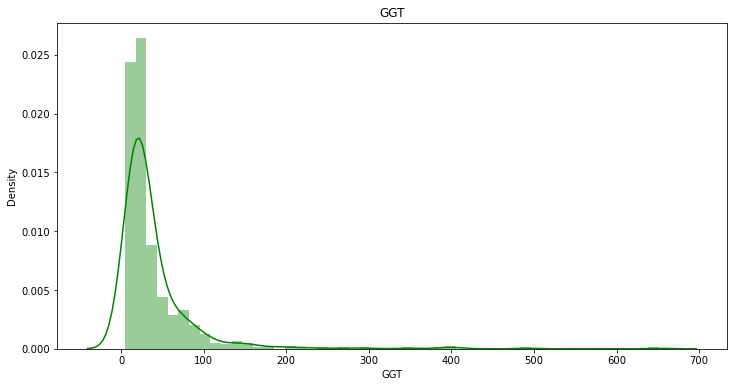

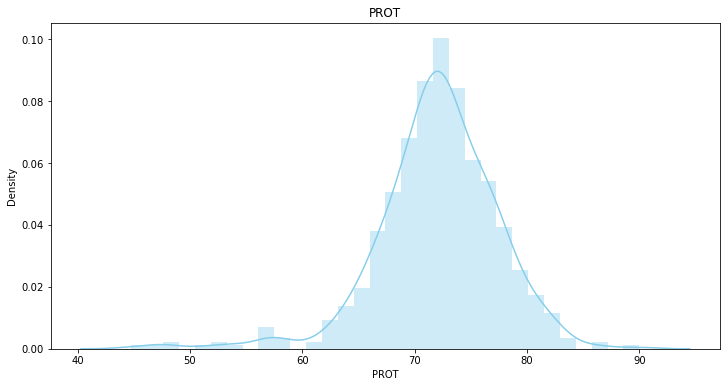

In [35]:
import random

for column in data.columns:
    if data[column].dtype != 'object':
        sns.distplot(data[column], color=random.choice(['green','pink','skyblue']))
        plt.title(column)
        plt.show()

In [36]:
data.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [37]:
for column in data.columns:
    if column not in ['Category','Sex'] and data[column].isnull().sum():
        data[column] = data[column].fillna(np.mean(data[column]))

In [38]:
data.tail(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
613,3=Cirrhosis,46,f,33.0,68.28392,39.0,62.0,20.0,3.56,4.2,52.0,50.0,71.0
614,3=Cirrhosis,59,f,36.0,68.28392,100.0,80.0,12.0,9.07,5.3,67.0,34.0,68.0


In [39]:
data.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [40]:
data['Sex'] = data['Sex'].apply(lambda x: 1 if x == 'm' else 0)

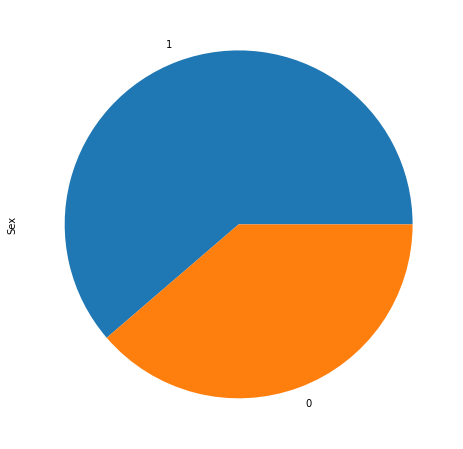

In [41]:
data.Sex.value_counts().plot(kind='pie', figsize=(8,8))
plt.show()

In [42]:
data['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [43]:
def categoryConverter(value):
    return 0 if value in ['0=Blood Donor','0s=suspect Blood Donor'] else 1

In [44]:
data['Category'] = data['Category'].apply(categoryConverter)

In [45]:
data['Category'].value_counts()

0    540
1     75
Name: Category, dtype: int64

In [46]:
data.head(2)

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5


In [47]:
data = data.sample(frac=1)

In [48]:
x= data.drop('Category', axis=1)
y = data.Category

In [49]:
X = scale(x)

In [50]:
X[:3]

array([[ 0.05891054, -1.25858397,  0.48166652, -0.14767612, -0.4424535 ,
        -0.41393764,  0.30031069, -1.48223082, -1.1741981 , -0.28739021,
        -0.50228619, -0.15650005],
       [-0.93641865, -1.25858397,  1.50398027,  0.92947702,  0.45812   ,
        -0.11754076, -0.36611352,  0.82734979, -1.24546425,  0.37638404,
        -0.16539236,  0.97441887],
       [-1.13548449,  0.79454373,  0.01382802,  0.34797043,  2.95534346,
         0.3663725 , -0.05070664,  1.82105932,  0.23330828,  0.13501159,
        -0.34116306, -0.50875348]])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.3, random_state=21, stratify=y)

In [52]:
forest = RandomForestClassifier()
xgb = XGBClassifier()
catboost = CatBoostClassifier(silent=True)
extraTrees = ExtraTreesClassifier()

In [53]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
y_pred = forest.predict(X_test)

In [55]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       170
           1       0.65      1.00      0.79        15

    accuracy                           0.96       185
   macro avg       0.83      0.98      0.88       185
weighted avg       0.97      0.96      0.96       185



In [56]:
extraTrees.fit(X_train,y_train)

ExtraTreesClassifier()

In [57]:
y_pred = extraTrees.predict(X_test)

In [58]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       171
           1       0.57      0.93      0.70        14

    accuracy                           0.94       185
   macro avg       0.78      0.94      0.83       185
weighted avg       0.96      0.94      0.95       185



In [59]:
xgb.fit(X_train,y_train)

[14:36:17] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
y_pred = xgb.predict(X_test)

In [61]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       163
           1       0.91      0.95      0.93        22

    accuracy                           0.98       185
   macro avg       0.95      0.97      0.96       185
weighted avg       0.98      0.98      0.98       185



In [62]:
catboost.fit(X_train,y_train)

In [63]:
y_pred = catboost.predict(X_test)

In [64]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       167
           1       0.74      0.94      0.83        18

    accuracy                           0.96       185
   macro avg       0.87      0.95      0.90       185
weighted avg       0.97      0.96      0.96       185



In [65]:
voting_classifier = VotingClassifier(estimators=[('xgb',xgb),('catboost',catboost)])

In [66]:
voting_classifier.fit(X,y)

[14:36:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1,
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=1, subsample=1,
                                            tree_method='exact',
                                            validate_parameters=1,
                                            verbosity=None)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000002908A61D490>)])

In [67]:
y_pred = voting_classifier.predict(X_test)

In [68]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       1.00      1.00      1.00        23

    accuracy                           1.00       185
   macro avg       1.00      1.00      1.00       185
weighted avg       1.00      1.00      1.00       185



In [69]:
import pickle
voting_classifier = pickle.dump(voting_classifier,open('voting_classifier.pkl','wb'))

In [70]:
voting_classifier.predict(np.array([-0.83688573,  0.79454373,  0.82821355,  1.35097173,  0.62722332,-0.25969028, -0.37120073,  0.49611328,  3.13740374,  0.43672716,
         0.44797412,  0.0288965]).reshape(1,-1))

AttributeError: 'NoneType' object has no attribute 'predict'

In [ ]:
data.columns